In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

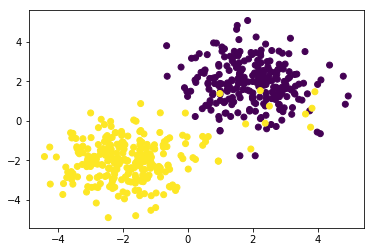

In [2]:
D = 2
N = 500

X0 = np.random.randn((N//2),D) + np.array([2,2])
X1 = np.random.randn((N//2),D) + np.array([-2,-2])
X = np.vstack((X0, X1))

X[-10:,:] += np.array([5,2])

y = np.array([0]*(N//2) + [1]*(N//2))

plt.figure()
plt.scatter(X[:,0], X[:,1], c = y)

In [3]:
def sigmoid(h):
    return 1/(1 + np.exp(-h))

def cross_entropy(y, p_hat):
    return -np.sum(y*np.log(p_hat) + (1 - y)*np.log(1 - p_hat))

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [4]:
X = np.column_stack((np.ones((N,1)),X))

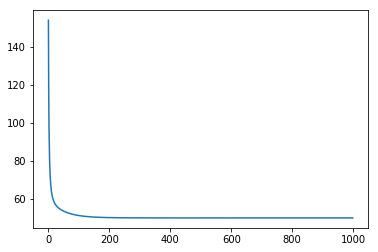

In [5]:
w = np.random.randn(D + 1)

eta = 1e-3
epochs = int(1e3)
J = [0]*epochs

for epoch in range(epochs):
    p_hat = sigmoid(X.dot(w))
    J[epoch] = cross_entropy(y, p_hat)
    w -= eta*X.T.dot(p_hat - y)
    
plt.figure()
plt.plot(J)

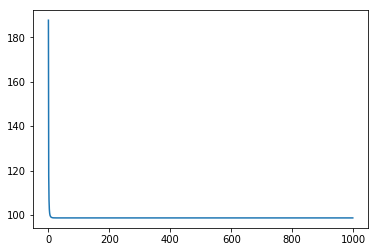

In [6]:
w1 = np.random.randn(D + 1)
lambda2 = 200

eta = 1e-3
epochs = int(1e3)
J = [0]*epochs

for epoch in range(epochs):
    p_hat1 = sigmoid(X.dot(w1))
    J[epoch] = cross_entropy(y, p_hat1)
    w1 -= eta*(X.T.dot(p_hat1 - y) + lambda2*w1)
    
plt.figure()
plt.plot(J)

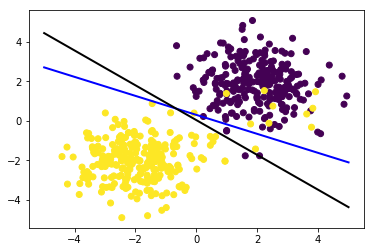

In [7]:
x1 = np.linspace(-5, 5, 50)
x2 = -(w[0]/w[2]) - (w[1]/w[2])*x1
x3 = -(w1[0]/w1[2]) - (w1[1]/w1[2])*x1

plt.figure()
plt.scatter(X[:,1], X[:,2], c = y)
plt.plot(x1, x2, color = "#0000FF", linewidth = 2) 
plt.plot(x1, x3, color = "000000", linewidth = 2)

The black line above is the one with the L2 regularization. The blue line one is without regularization. The black line should perfom better with new test data as it is ignoring outliers.

In [8]:
y_hat = np.round(p_hat)

print("Accuracy: {:0.4f}".format(accuracy(y, y_hat)))

#I ended up with a pretty good acuracy.

Accuracy: 0.9720


In [10]:
y_hat = np.round(p_hat1)

print("Accuracy: {:0.4f}".format(accuracy(y, y_hat)))

#I ended up with a good accuracy still, and hopefully this will perform better agaisnt a test set

Accuracy: 0.9760
